In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
# customize different personal options
plt.style.use('ggplot')

# pd.set_option('max_columns',200)

# EDA

> ## Data Overview

In [4]:
csv_file_name = 'data.csv'

path_to_csv = os.path.join('..', 'docs', 'data', csv_file_name)

data = pd.read_csv(path_to_csv)

data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
data.shape # cols and rows

(95662, 16)

In [6]:
data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [7]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [8]:
print(f'Number of rows: {data.shape[0]}')
for col in data.columns:
    print(f'{col}: {data[col].nunique()}')

Number of rows: 95662
TransactionId: 95662
BatchId: 94809
AccountId: 3633
SubscriptionId: 3627
CustomerId: 3742
CurrencyCode: 1
CountryCode: 1
ProviderId: 6
ProductId: 23
ProductCategory: 9
ChannelId: 4
Amount: 1676
Value: 1517
TransactionStartTime: 94556
PricingStrategy: 4
FraudResult: 2


In [9]:
skewness = data['FraudResult'].skew()
kurtosis = data['FraudResult'].kurtosis()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Skewness: 22.196294806589147
Kurtosis: 490.6857618799325


In [10]:
print(data[data['FraudResult']==0].shape[0])
print(data[data['FraudResult']==1].shape[0])

95469
193


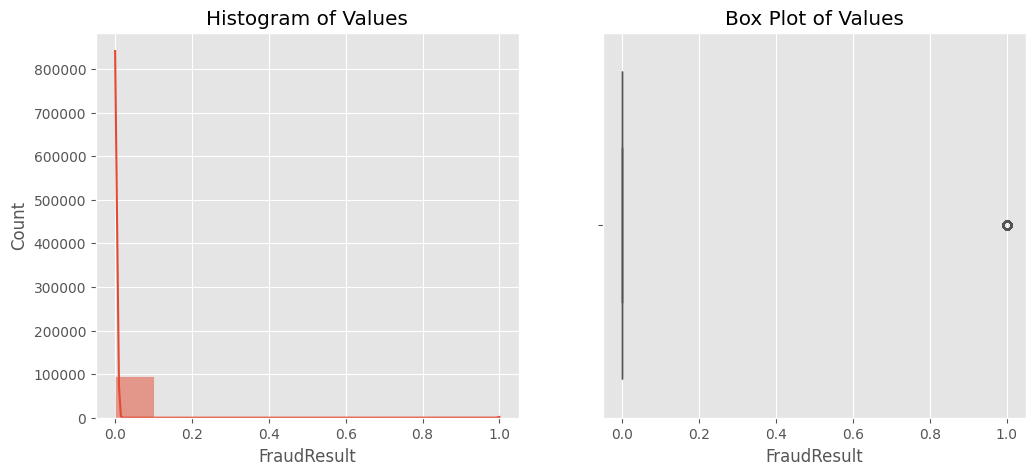

In [11]:
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['FraudResult'], bins=10, kde=True)
plt.title('Histogram of Values')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['FraudResult'])
plt.title('Box Plot of Values')

plt.show()

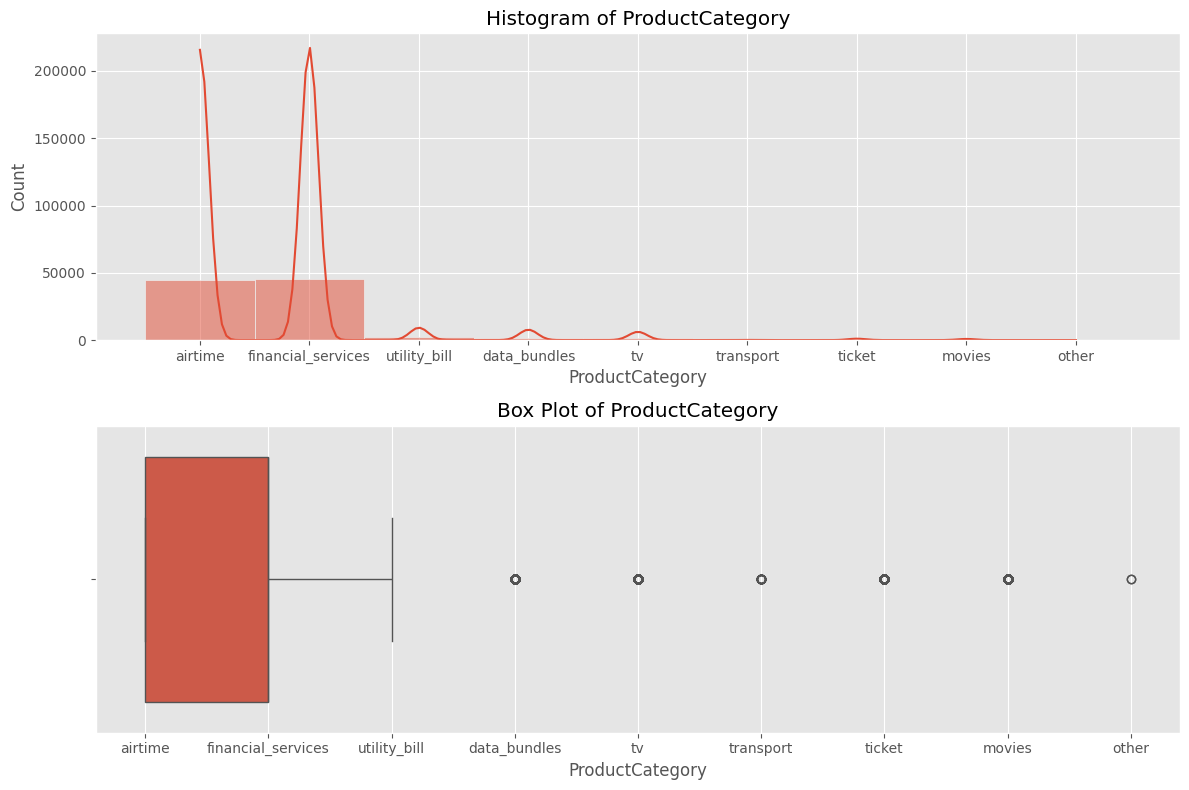

In [12]:
plt.figure(figsize=(12, 8))
# Histogram
plt.subplot(2, 1, 1)
sns.histplot(data['ProductCategory'], bins=10, kde=True)
plt.title('Histogram of ProductCategory')

# Box Plot
plt.subplot(2, 1, 2)
sns.boxplot(x=data['ProductCategory'])
plt.title('Box Plot of ProductCategory')

plt.tight_layout()
plt.show()

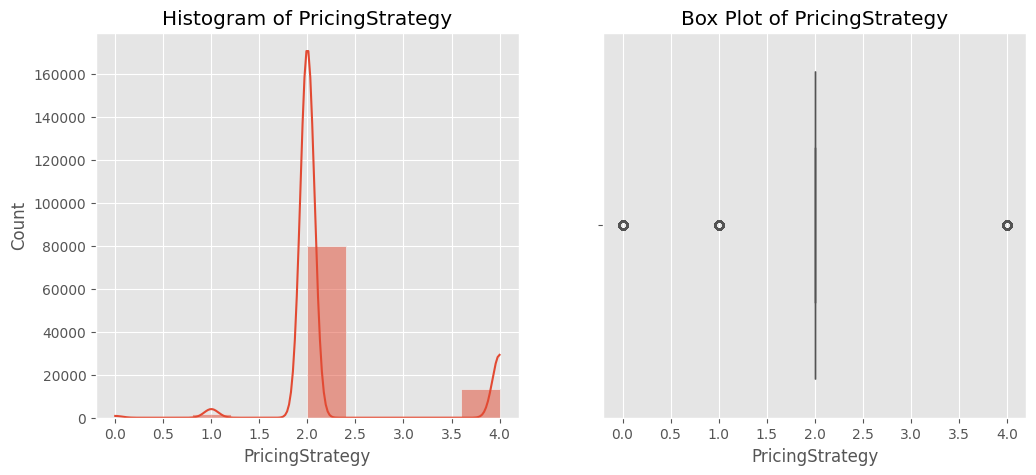

In [13]:
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['PricingStrategy'], bins=10, kde=True)
plt.title('Histogram of PricingStrategy')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['PricingStrategy'])
plt.title('Box Plot of PricingStrategy')

plt.show()

>> ### Distribution of Numerical Features

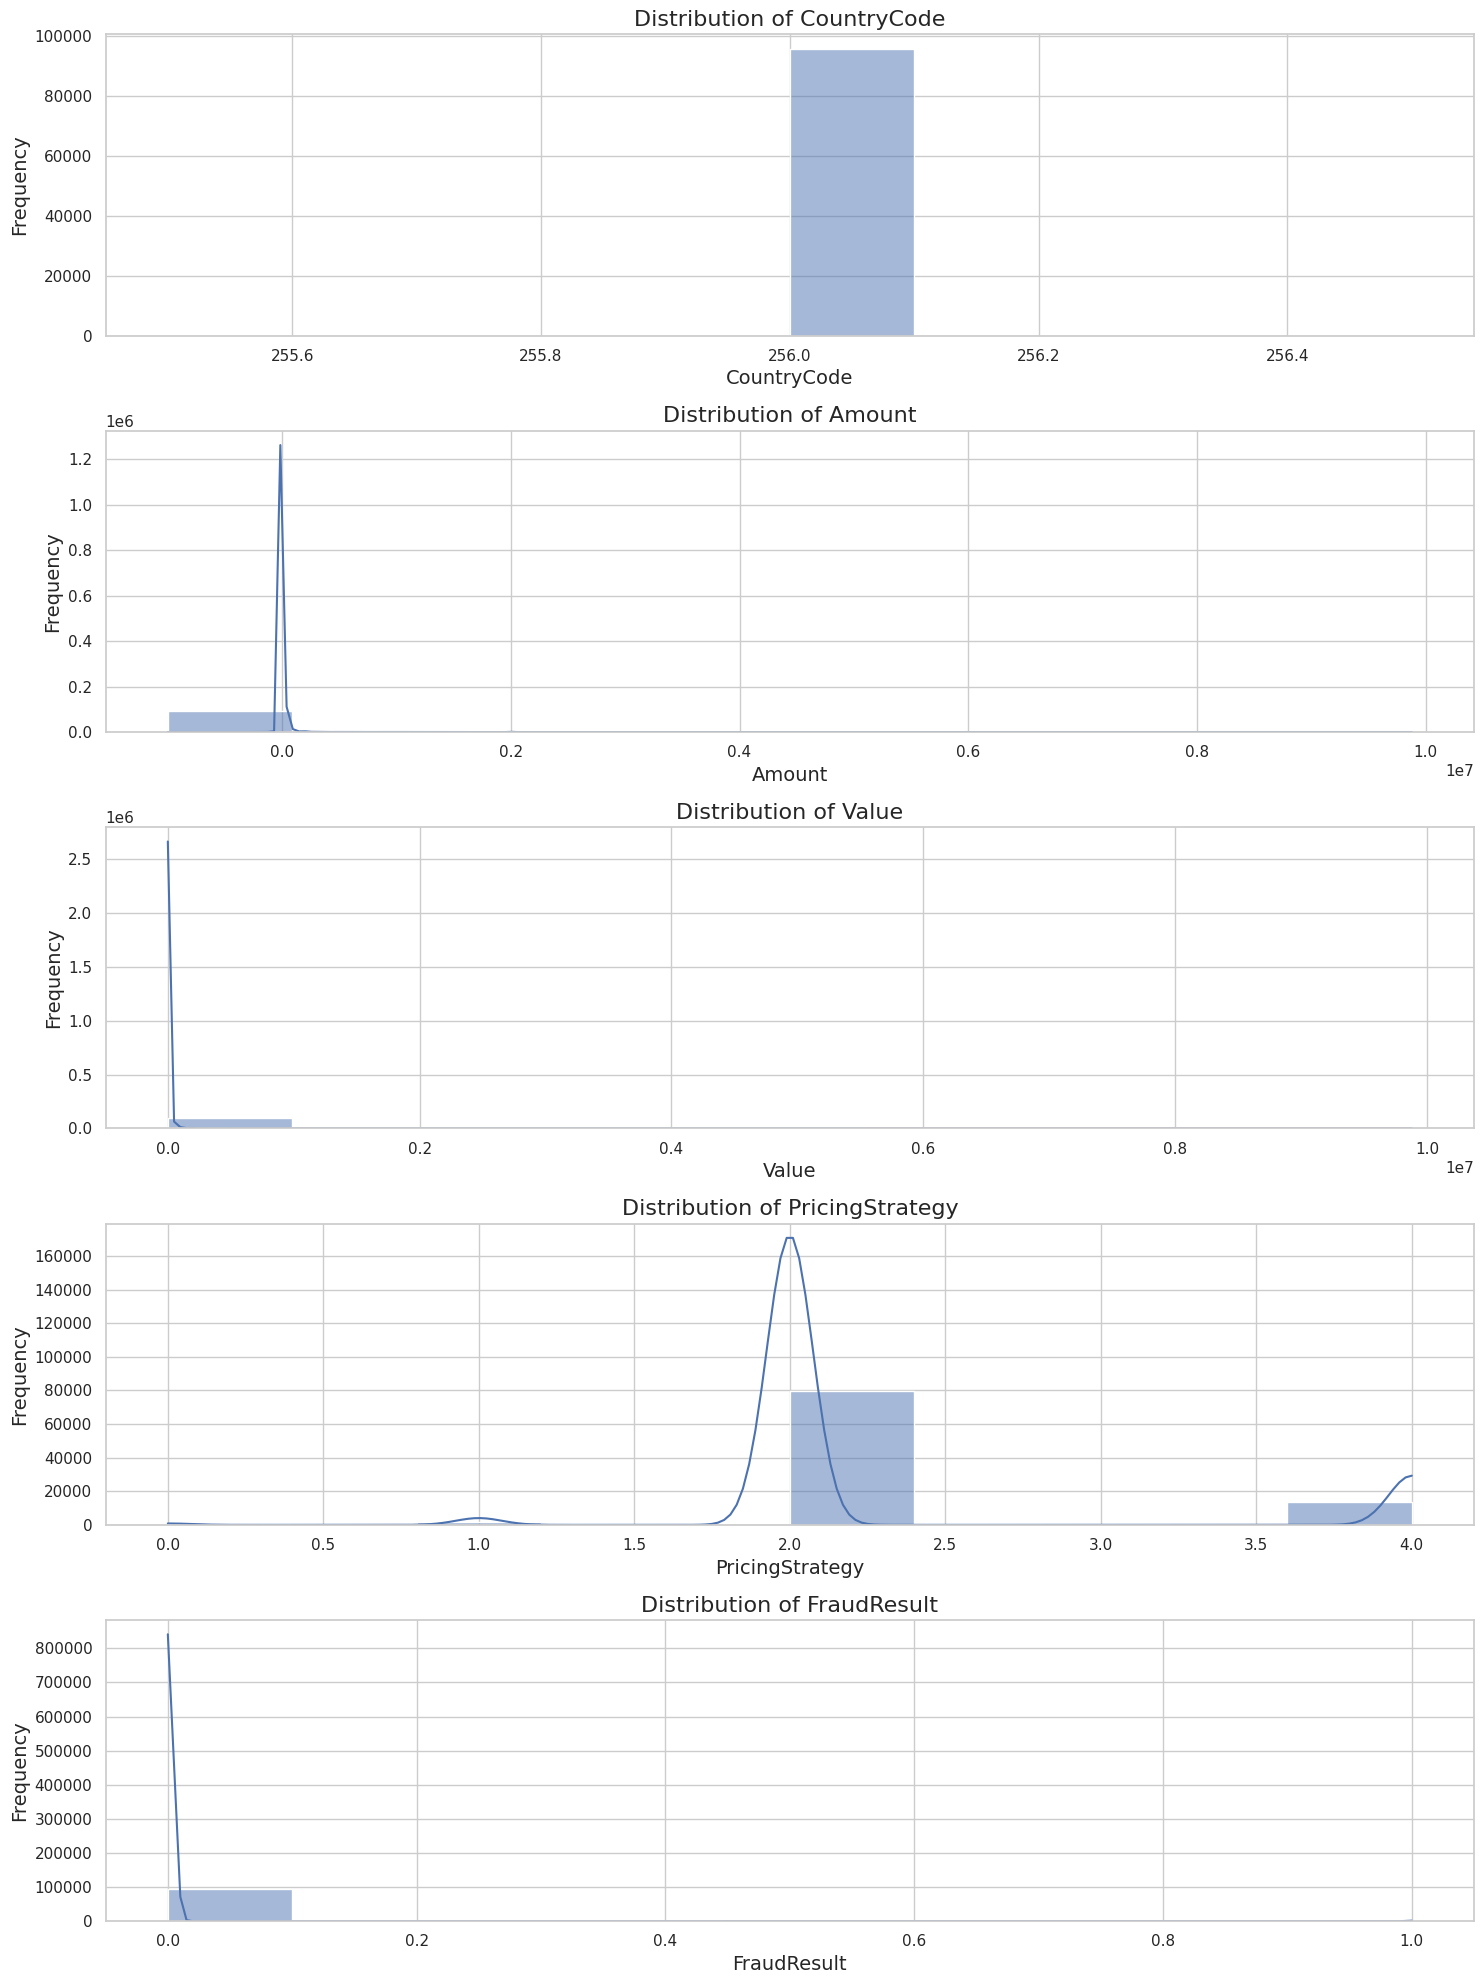

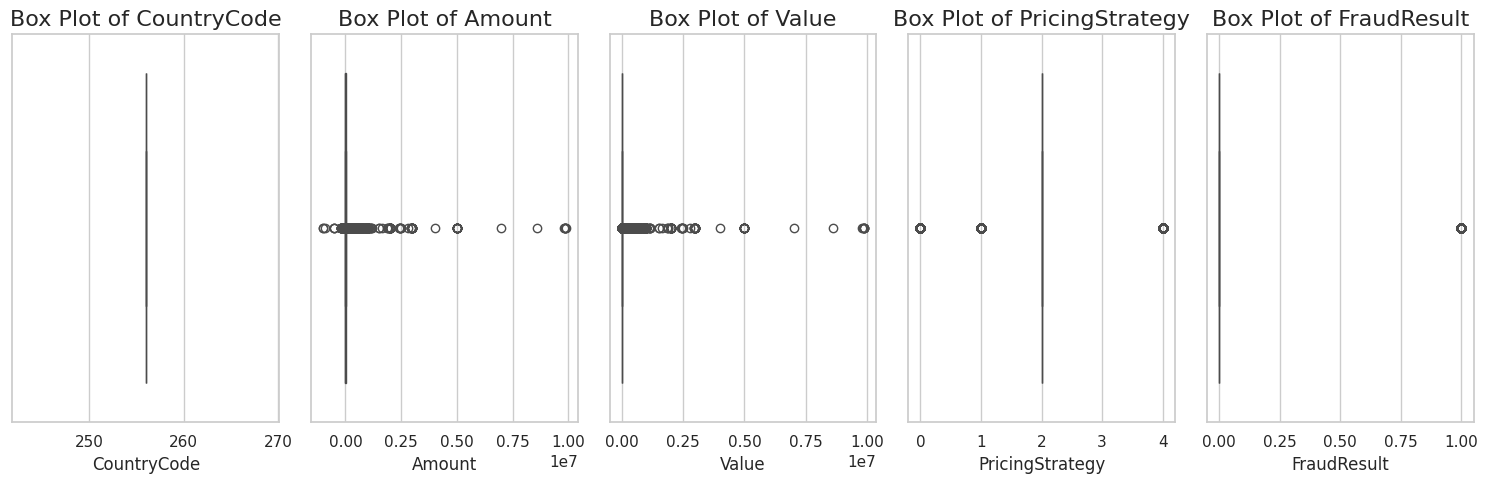

In [14]:
def visualize_numerical_features(dataframe):
    numerical_cols = dataframe.select_dtypes(include=['number']).columns
    
    # Set plot style
    sns.set(style='whitegrid')
    
    # Create a figure to hold the subplots for histogram and KDE
    plt.figure(figsize=(15, 4 * len(numerical_cols)))
    
    # Histograms with KDE
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 1, i)
        sns.histplot(dataframe[col], bins=10, kde=True)
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    # Create a figure to hold the box plots
    plt.figure(figsize=(15, 5))
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(1, len(numerical_cols), i)
        sns.boxplot(x=dataframe[col])
        plt.title(f'Box Plot of {col}', fontsize=16)

    plt.tight_layout()
    plt.show()

# Call the function
visualize_numerical_features(data)

>> ### Distribution of Categorical Features

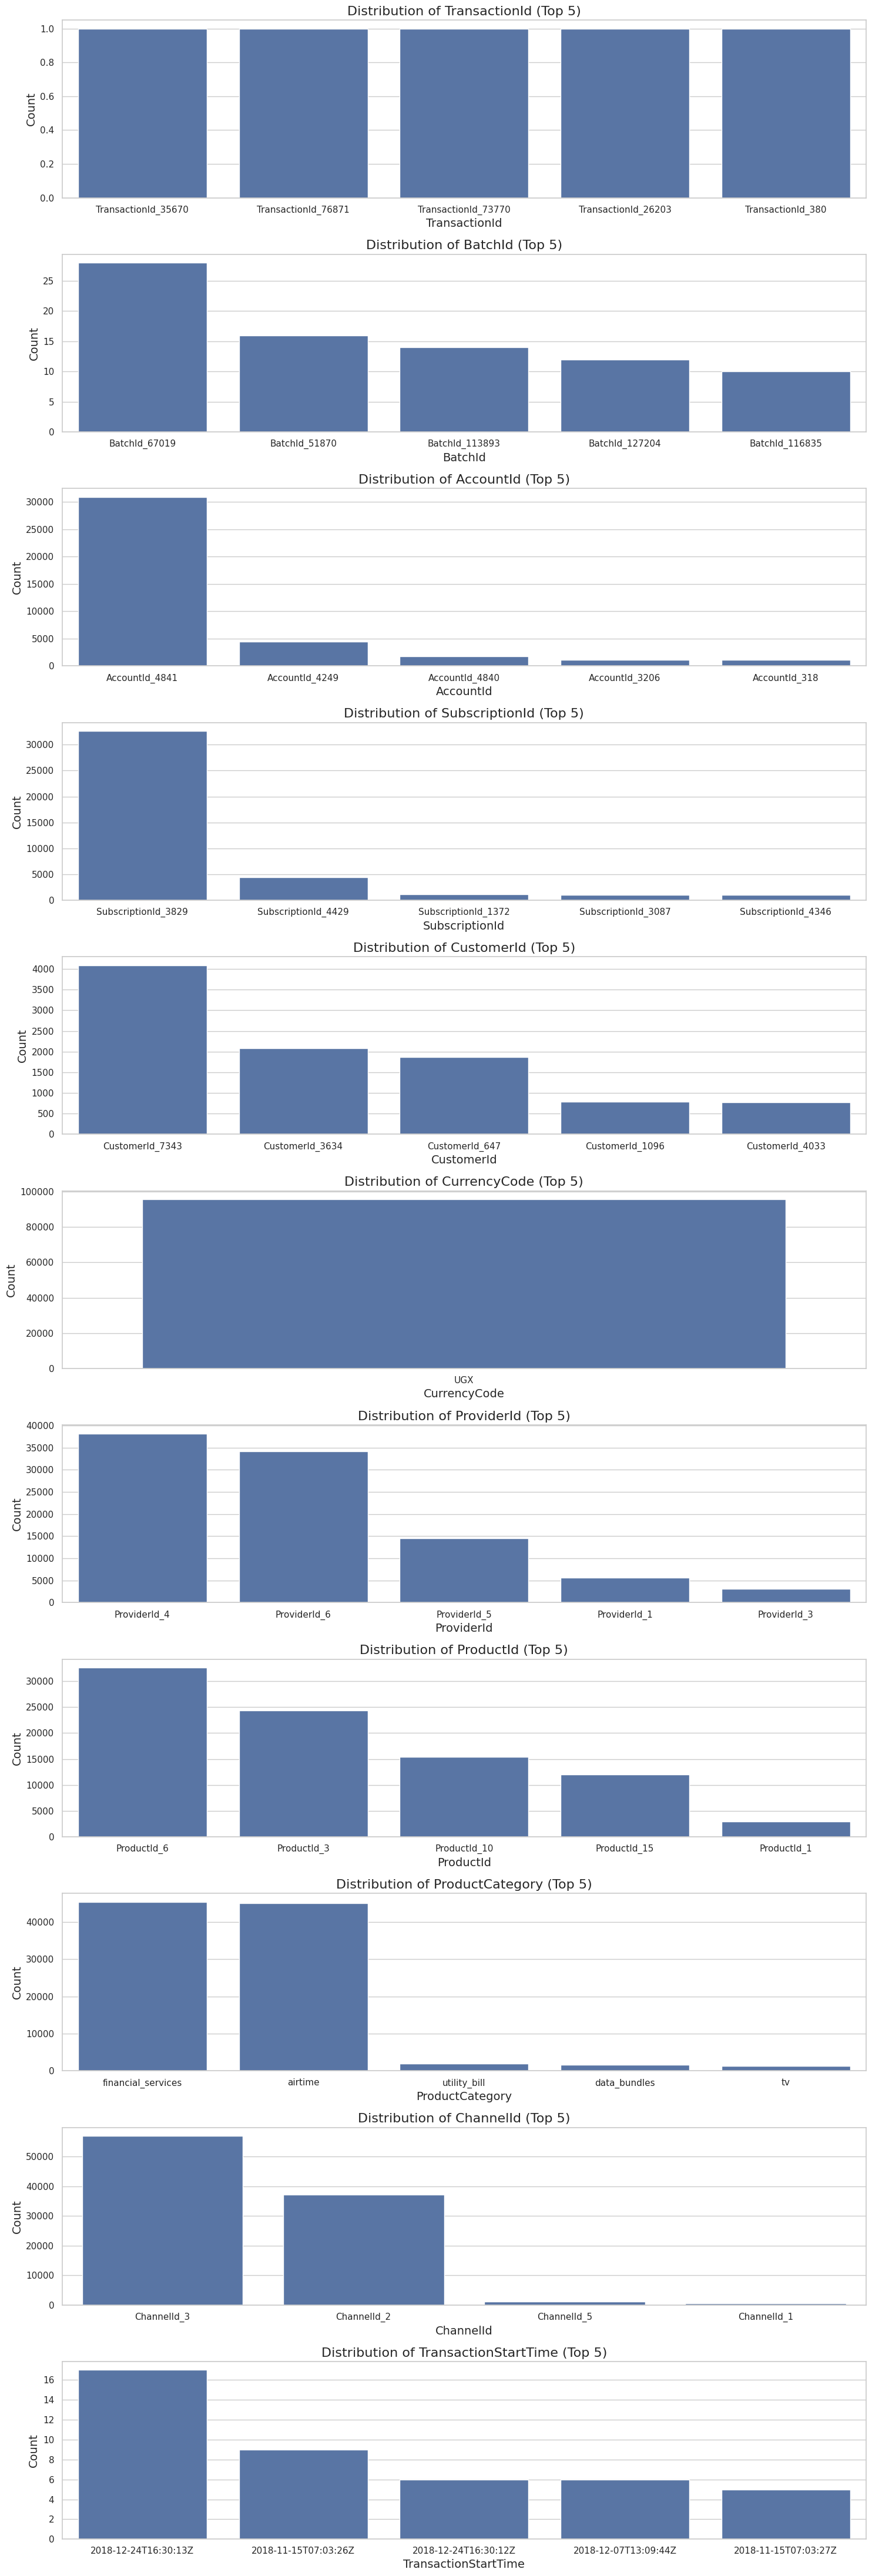

In [15]:
def visualize_categorical_features(dataframe, top_n=5):
    # Check for empty DataFrame
    if dataframe.empty:
        print("The DataFrame is empty.")
        return
    
    # Identify categorical columns
    categorical_cols = dataframe.select_dtypes(include=['object', 'category']).columns
    
    # Check if there are any categorical columns
    if len(categorical_cols) == 0:
        print("No categorical columns found.")
        return

    # Set plot style
    sns.set(style='whitegrid')

    # Create a figure to hold the subplots for count plots
    plt.figure(figsize=(15, 4 * len(categorical_cols)))

    # Count plots for categorical features
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols), 1, i)
        # Get top N categories
        top_categories = dataframe[col].value_counts().nlargest(top_n).index
        sns.countplot(data=dataframe[dataframe[col].isin(top_categories)], x=col, order=top_categories)
        plt.title(f'Distribution of {col} (Top {top_n})', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)

    plt.tight_layout()
    plt.show()

# Call the function
visualize_categorical_features(data, top_n=5)

In [19]:
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols]

,CountryCode,Amount,Value,PricingStrategy,FraudResult
0,256,1000.0,1000,2,0
1,256,-20.0,20,2,0
2,256,500.0,500,2,0
3,256,20000.0,21800,2,0
4,256,-644.0,644,2,0
...,...,...,...,...,...
95657,256,-1000.0,1000,2,0
95658,256,1000.0,1000,2,0
95659,256,-20.0,20,2,0
95660,256,3000.0,3000,2,0


> ## Correlation Analysis

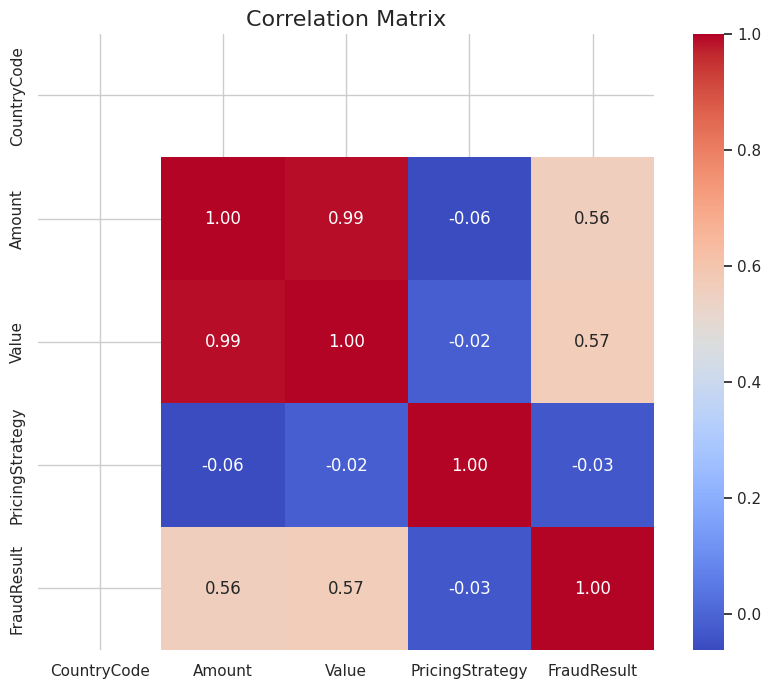

In [20]:
def correlation_analysis(dataframe):
    numerical_cols = dataframe.select_dtypes(include=['number']).columns
    dataframe = dataframe[numerical_cols]
    correlation_matrix = dataframe.corr()
    
    # Set plot style
    sns.set(style='whitegrid')
    
    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Call the function
correlation_analysis(data)

> ## Identifying Missing Values

In [22]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(f"Missing Values Summary: {missing_values}")
print(missing_summary[missing_summary['Missing Values'] > 0])

Missing Values Summary: TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


# Feature Engineering

In [27]:
data.sample(1)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
74325,TransactionId_38793,BatchId_75865,AccountId_4841,SubscriptionId_3829,CustomerId_3720,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-75.0,75,2019-01-26T17:57:30Z,2,0


In [24]:
aggregate_features = data.groupby('CustomerId').agg(
    Total_Transaction_Amount=('Amount', 'sum'),
    Average_Transaction_Amount=('Amount', 'mean'),
    Transaction_Count=('TransactionId', 'count'),
    Std_Deviation_Transaction_Amount=('Amount', 'std')
).reset_index()

aggregate_features.head(10)

,CustomerId,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount
0,CustomerId_1,-10000.0,-10000.000000,1,NaN
1,CustomerId_10,-10000.0,-10000.000000,1,NaN
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146
5,CustomerId_1004,2000.0,2000.000000,1,NaN
6,CustomerId_1005,48800.0,5422.222222,9,5983.681513
7,CustomerId_1006,1000.0,1000.000000,1,NaN
8,CustomerId_1007,28000.0,28000.000000,1,NaN
9,CustomerId_1008,20000.0,10000.000000,2,0.000000


In [31]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Extract features from the TransactionStartTime
data['Transaction_Hour'] = data['TransactionStartTime'].dt.hour
data['Transaction_Day'] = data['TransactionStartTime'].dt.day
data['Transaction_Month'] = data['TransactionStartTime'].dt.month
data['Transaction_Year'] = data['TransactionStartTime'].dt.year
data[['TransactionStartTime', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year']].head()

,TransactionStartTime,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018


In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', dtype=int)

# Select categorical columns for encoding
categorical_columns = ['ProductCategory', 'ChannelId', 'CurrencyCode']

# Fit and transform the data
encoded_features = encoder.fit_transform(data[categorical_columns])

# Check the shape of encoded_features
print(f"Shape of encoded features: {encoded_features.shape}")

# Create a DataFrame from the encoded features
# Ensure to use get_feature_names_out() correctly
encoded_df = pd.DataFrame(encoded_features.toarray(), 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame with the new encoded DataFrame
df_encoded = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop original categorical columns if no longer needed
df_encoded.drop(columns=categorical_columns, inplace=True)

# Display the updated DataFrame
df_encoded.head()

Shape of encoded features: (95662, 11)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,Amount,Value,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,ProviderId_6,ProductId_10,1000.0,1000,...,0,0,0,0,0,0,0,0,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,ProviderId_4,ProductId_6,-20.0,20,...,1,0,0,0,0,0,0,1,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,ProviderId_6,ProductId_1,500.0,500,...,0,0,0,0,0,0,0,0,1,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,ProviderId_1,ProductId_21,20000.0,21800,...,0,0,0,0,0,0,1,0,1,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,ProviderId_4,ProductId_6,-644.0,644,...,1,0,0,0,0,0,0,1,0,0


In [37]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical variables
data['ProductCategory_Label'] = label_encoder.fit_transform(data['ProductCategory'])
data['ChannelId_Label'] = label_encoder.fit_transform(data['ChannelId'])
data['CurrencyCode_Label'] = label_encoder.fit_transform(data['CurrencyCode'])

# Display the DataFrame after Label Encoding
data[['ProductCategory', 'ProductCategory_Label', 'ChannelId', 'ChannelId_Label', 'CurrencyCode', 'CurrencyCode_Label']].head()

,ProductCategory,ProductCategory_Label,ChannelId,ChannelId_Label,CurrencyCode,CurrencyCode_Label
0,airtime,0,ChannelId_3,2,UGX,0
1,financial_services,2,ChannelId_2,1,UGX,0
2,airtime,0,ChannelId_3,2,UGX,0
3,utility_bill,8,ChannelId_3,2,UGX,0
4,financial_services,2,ChannelId_2,1,UGX,0


In [ ]:
print(data.isnull().sum())
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), 
                          columns=data.select_dtypes(include=[np.number]).columns)

# Replace the original DataFrame's numerical columns with imputed values
data[data.select_dtypes(include=[np.number]).columns] = df_imputed

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply normalization
df_normalized = data.copy()  # Create a copy to avoid modifying the original DataFrame
df_normalized[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(df_normalized.head())

In [ ]:
# Initialize StandardScaler
standard_scaler = StandardScaler()

# Apply standardization
df_standardized = data.copy()  # Create a copy to avoid modifying the original DataFrame
df_standardized[numerical_columns] = standard_scaler.fit_transform(data[numerical_columns])

# Display the standardized DataFrame
print("Standardized DataFrame:")
print(df_standardized.head())